In [73]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb  
sb.set_style('darkgrid')

In [42]:
daily_data = pd.read_csv('daily_rates.csv', skiprows=3, header=0)

In [43]:
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]



In [44]:
print weekly_data.head(5)

           DATE  XUDLERS  XUDLUSS   datetime  dayofweek
3   07 Jan 2000   1.5909   1.6372 2000-01-07          4
8   14 Jan 2000   1.6152   1.6349 2000-01-14          4
13  21 Jan 2000   1.6391   1.6506 2000-01-21          4
18  28 Jan 2000   1.6529   1.6198 2000-01-28          4
23  04 Feb 2000   1.6214   1.5886 2000-02-04          4


In [56]:
UK_US = pd.DataFrame()
UK_US['UK_US']=weekly_data['XUDLUSS']
UK_US['datetime']=weekly_data['datetime']
UK_US = UK_US.reset_index(drop=True)

UK_EU = pd.DataFrame()
UK_EU['UK_EU']=weekly_data['XUDLERS']
UK_EU['datetime']=weekly_data['datetime']
UK_EU = UK_EU.reset_index(drop=True)



/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


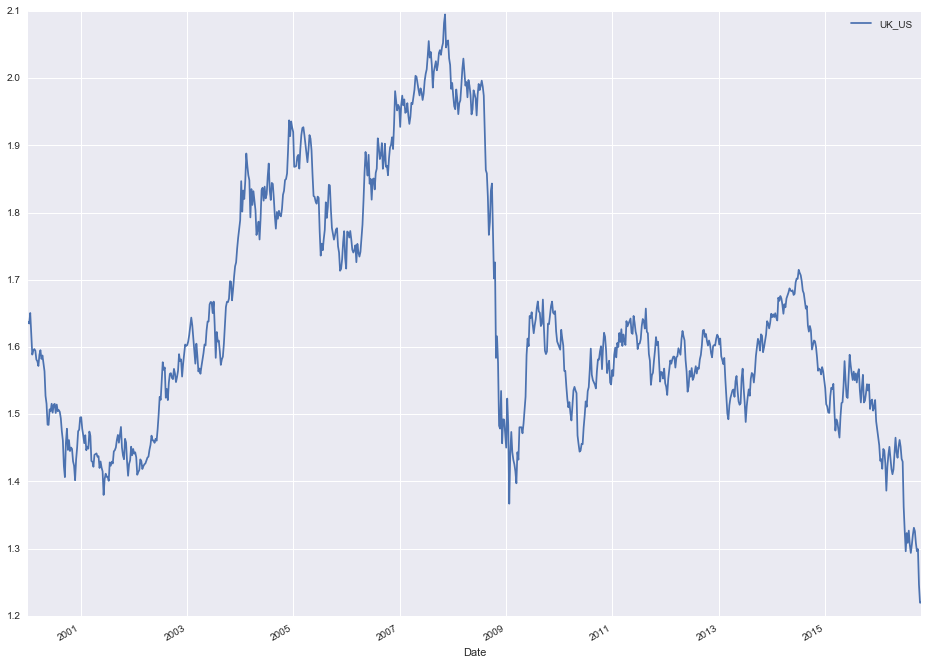

In [57]:
UK_US['Date'] = UK_US['datetime'].convert_objects(convert_dates='coerce')  
UK_US = UK_US.sort_index(by='Date')  
UK_US = UK_US.set_index('Date')  
UK_US.plot(figsize=(16, 12))  


/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


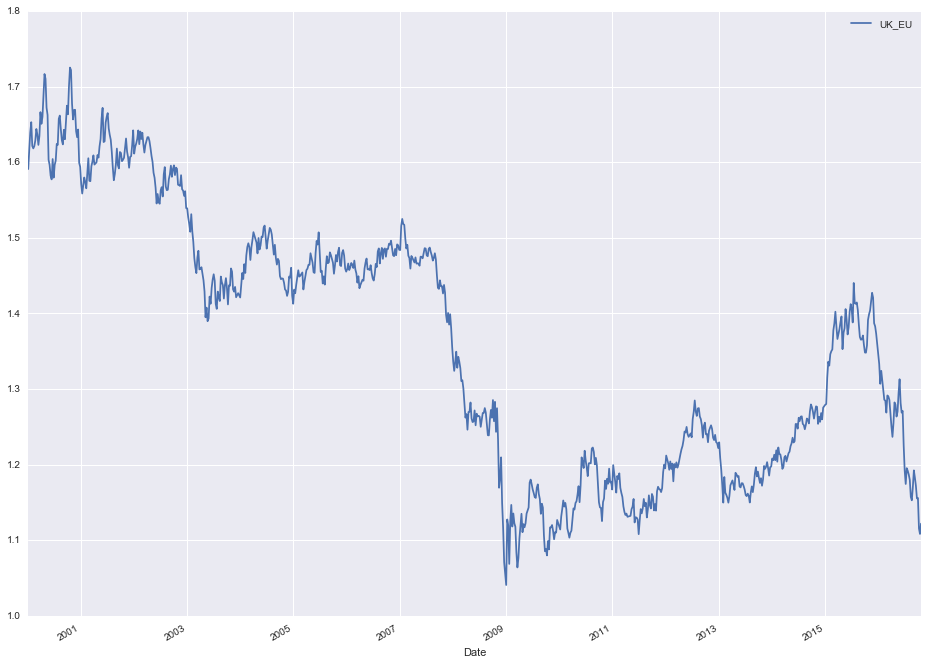

In [58]:
UK_EU['Date'] = UK_EU['datetime'].convert_objects(convert_dates='coerce')  
UK_EU = UK_EU.sort_index(by='Date')  
UK_EU = UK_EU.set_index('Date')  
UK_EU.plot(figsize=(16, 12))  



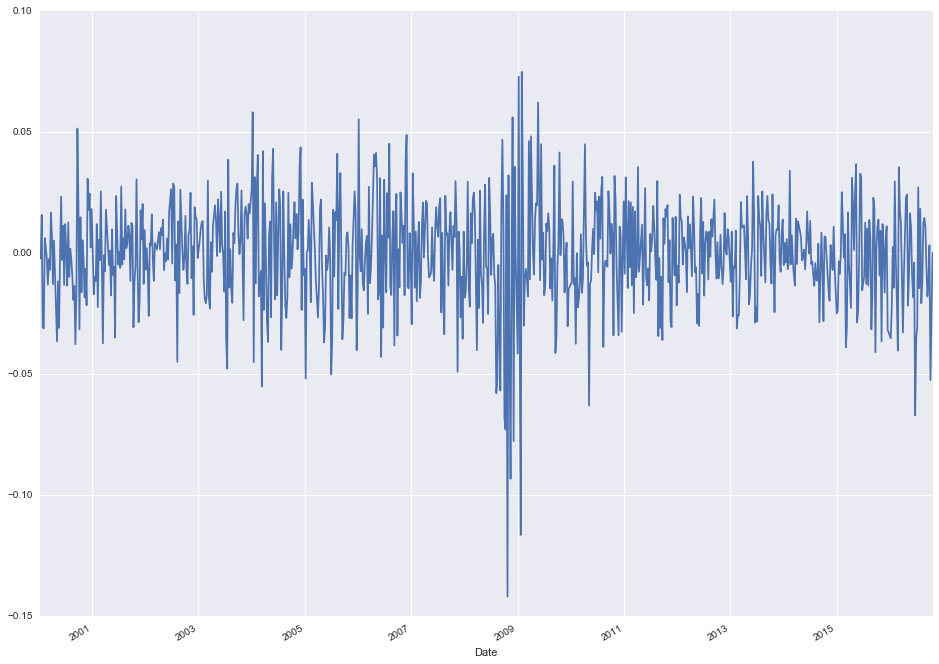

In [59]:
UK_US['First Difference'] = UK_US['UK_US'] - UK_US['UK_US'].shift()  
UK_US['First Difference'].plot(figsize=(16, 12))  

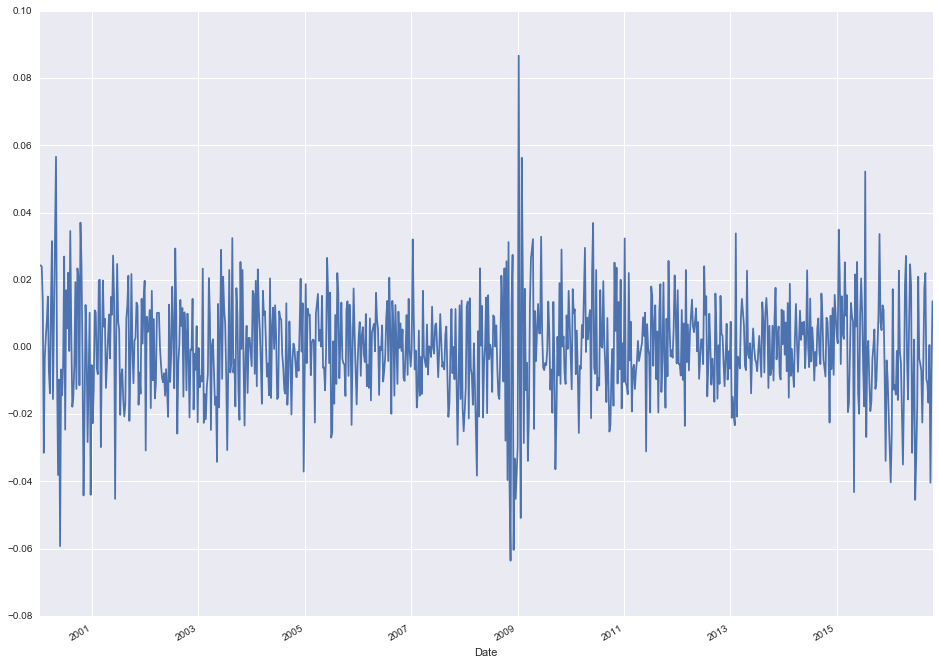

In [61]:
UK_EU['First Difference'] = UK_EU['UK_EU'] - UK_EU['UK_EU'].shift()  
UK_EU['First Difference'].plot(figsize=(16, 12))  

In [65]:
UK_US['variance'] = pd.rolling_var(UK_US['UK_US'], 4, min_periods=None, freq=None, center=True)  
UK_EU['variance'] = pd.rolling_var(UK_EU['UK_EU'], 4, min_periods=None, freq=None, center=True)  

/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).var()
  if __name__ == '__main__':
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).var()
  from ipykernel import kernelapp as app


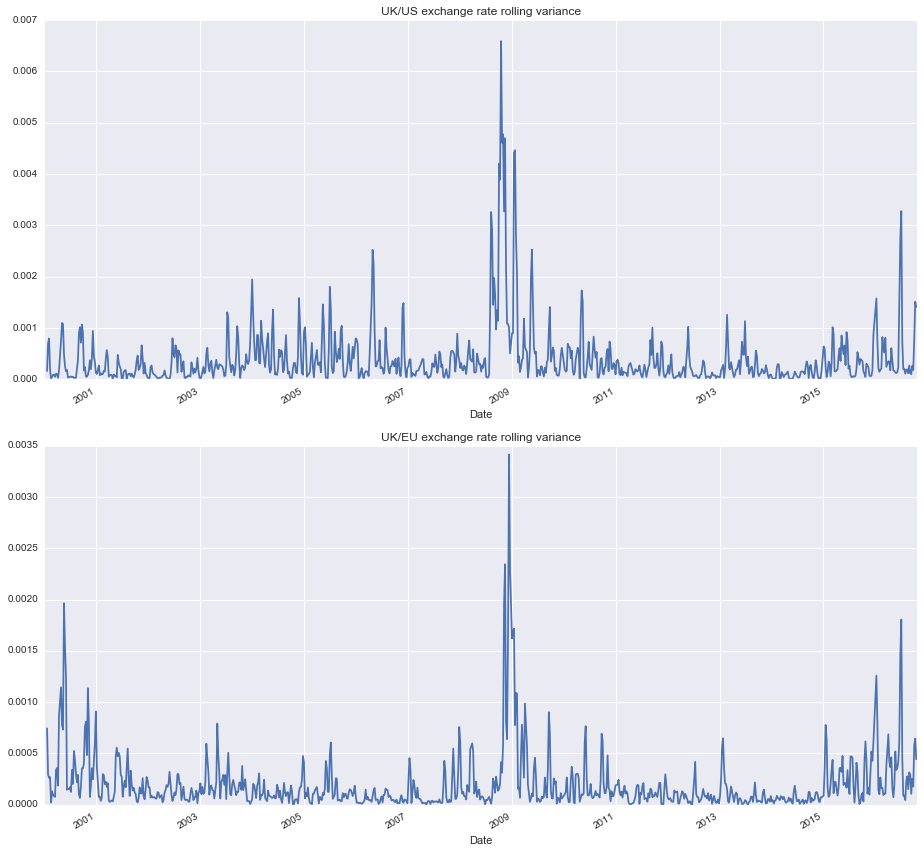

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
UK_US['variance'].plot(ax=ax[0], title='UK/US exchange rate rolling variance')  
UK_EU['variance'].plot(ax=ax[1], title='UK/EU exchange rate rolling variance')  
fig.tight_layout()  

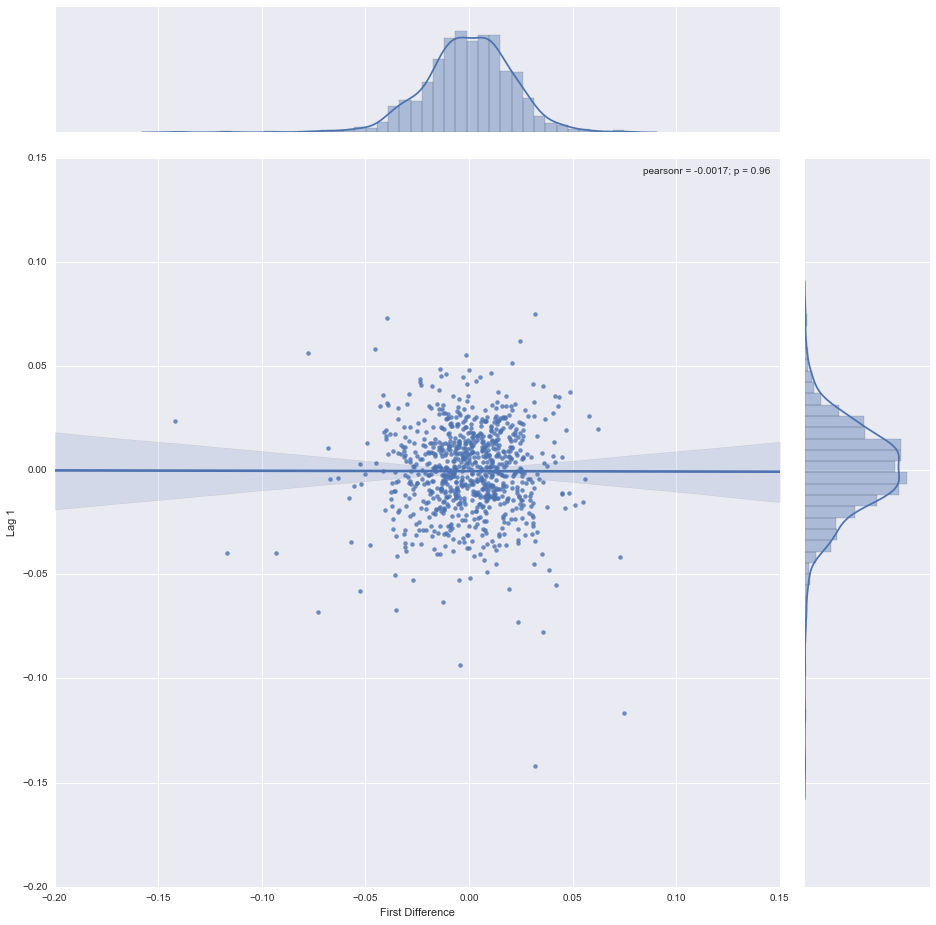

In [68]:
UK_US['Lag 1'] = UK_US['First Difference'].shift()  
sb.jointplot('First Difference', 'Lag 1', UK_US, kind='reg', size=13) 


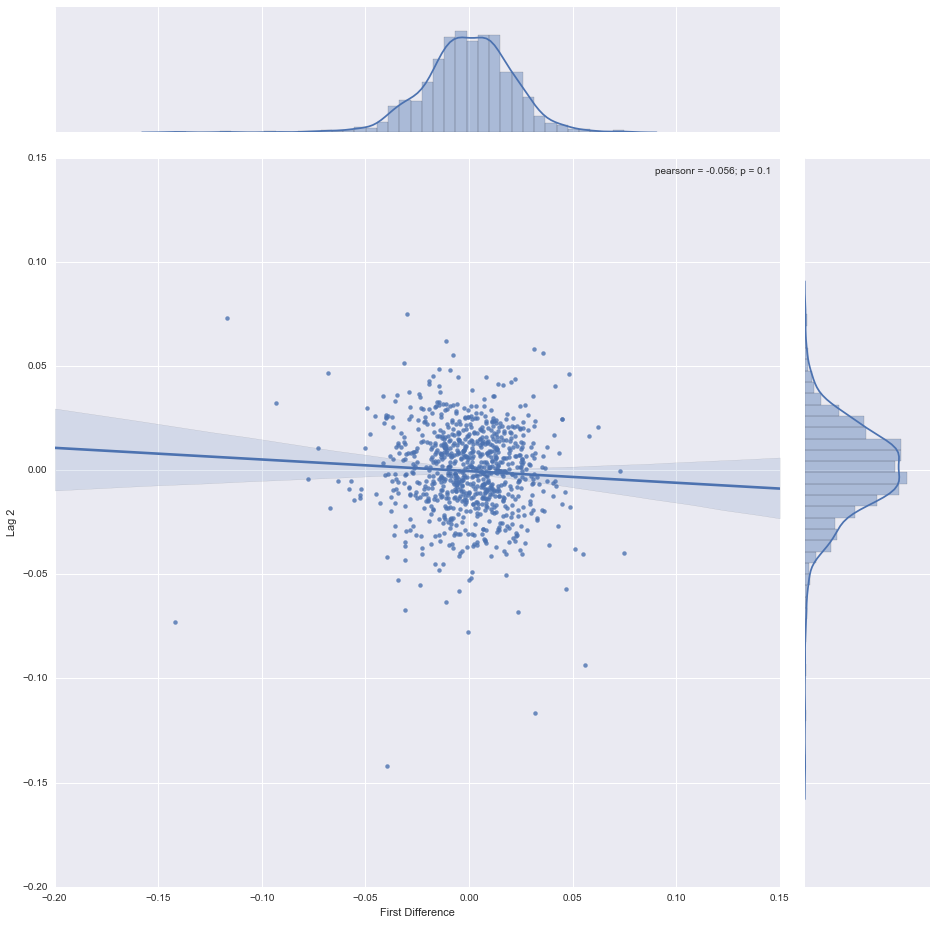

In [69]:
UK_US['Lag 2'] = UK_US['First Difference'].shift(2)  
sb.jointplot('First Difference', 'Lag 2', UK_US, kind='reg', size=13) 



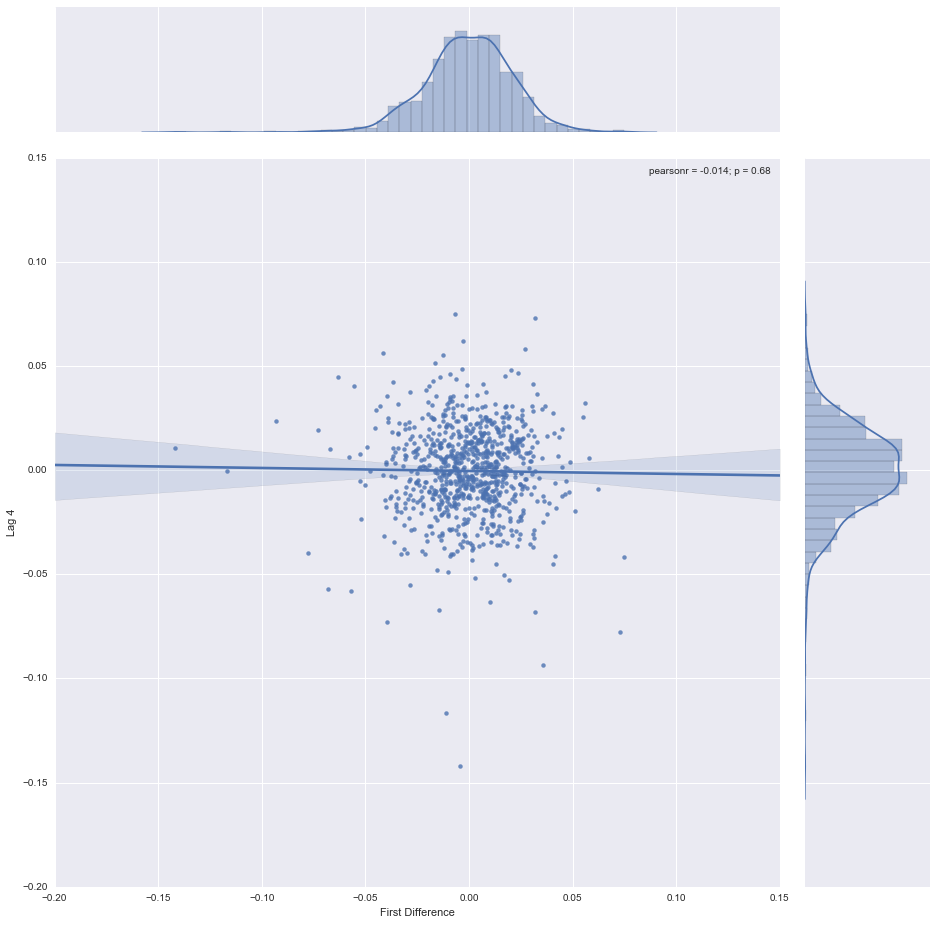

In [70]:
UK_US['Lag 4'] = UK_US['First Difference'].shift(4)  
sb.jointplot('First Difference', 'Lag 4', UK_US, kind='reg', size=13) 



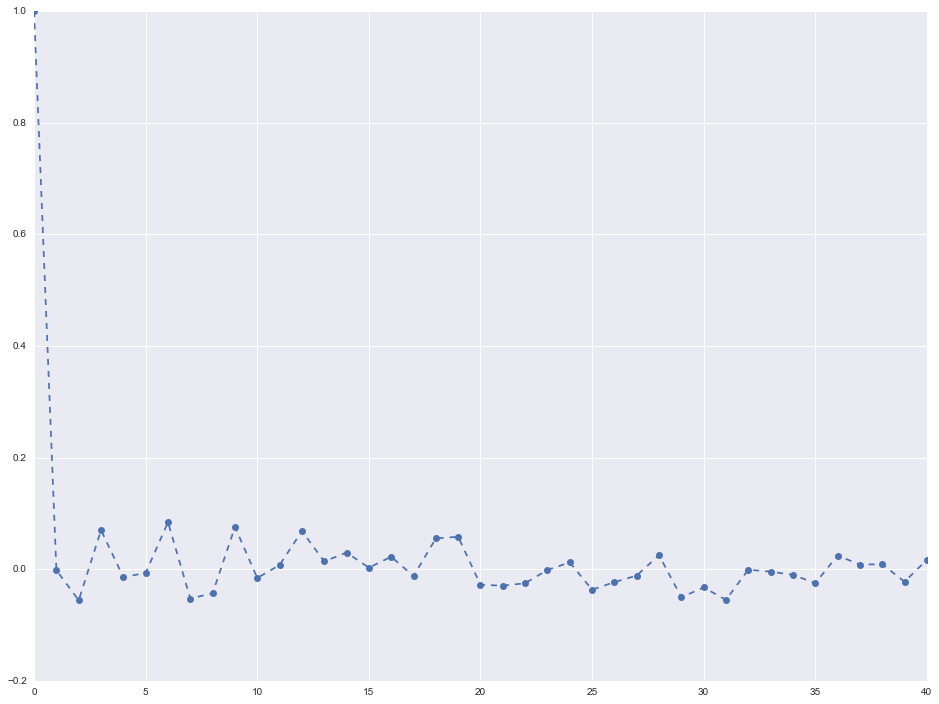

In [72]:
lag_correlations_UK_US = acf(UK_US['First Difference'].iloc[1:])  
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations_UK_US, marker='o', linestyle='--')  

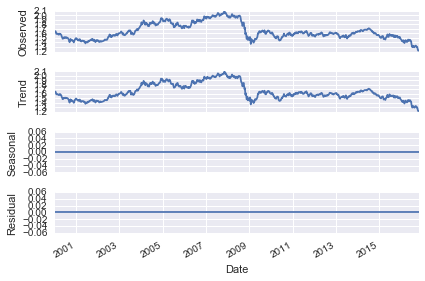

In [88]:
decomposition_UK_US = seasonal_decompose(UK_US['UK_US'], model='additive', freq=1)  
fig = plt.figure()  
fig = decomposition_UK_US.plot()  

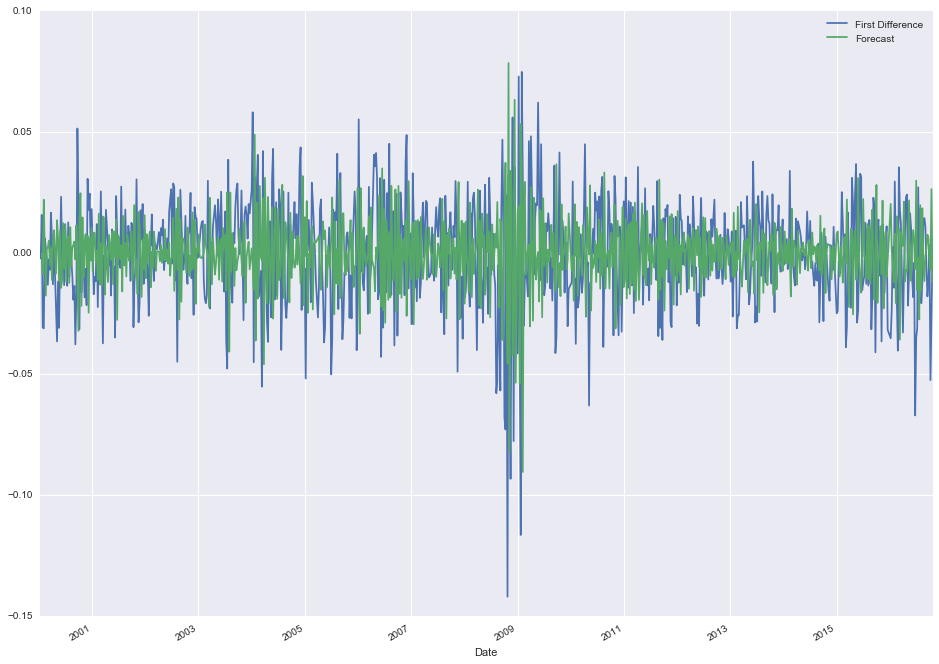

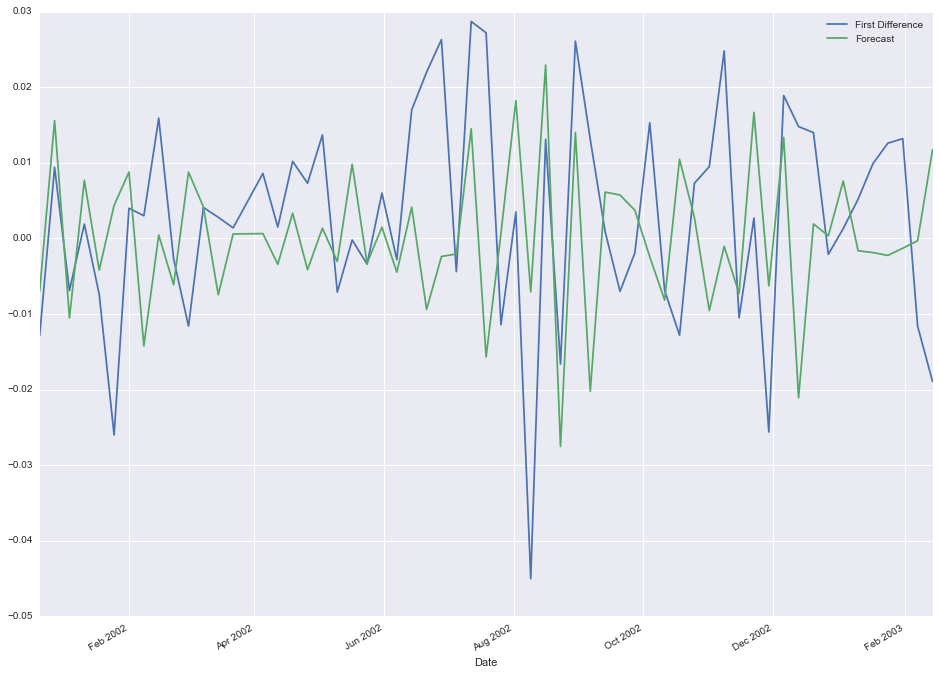

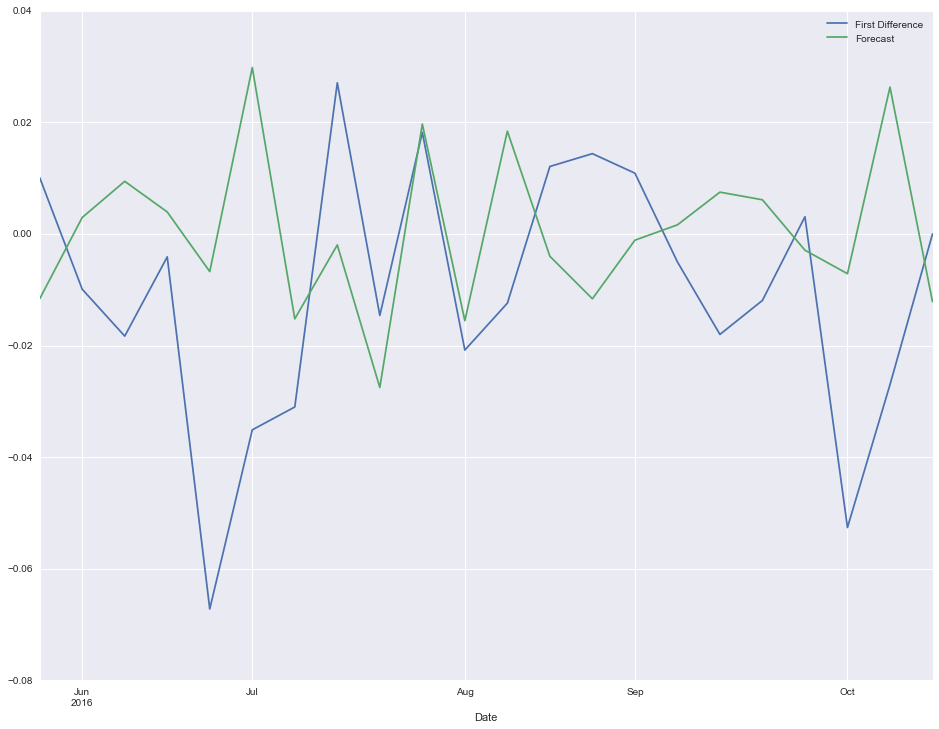

In [151]:
model_UK_US = sm.tsa.ARIMA(UK_US['First Difference'].iloc[1:], order=(1, 1, 0), dates=UK_US['datetime'])  
results = model_UK_US.fit(disp=-1)  
UK_US['Forecast'] = results.fittedvalues  
UK_US[['First Difference', 'Forecast']].plot(figsize=(16, 12))  
UK_US[['First Difference', 'Forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
UK_US[['First Difference', 'Forecast']].iloc[830:860, :].plot(figsize=(16, 12))  

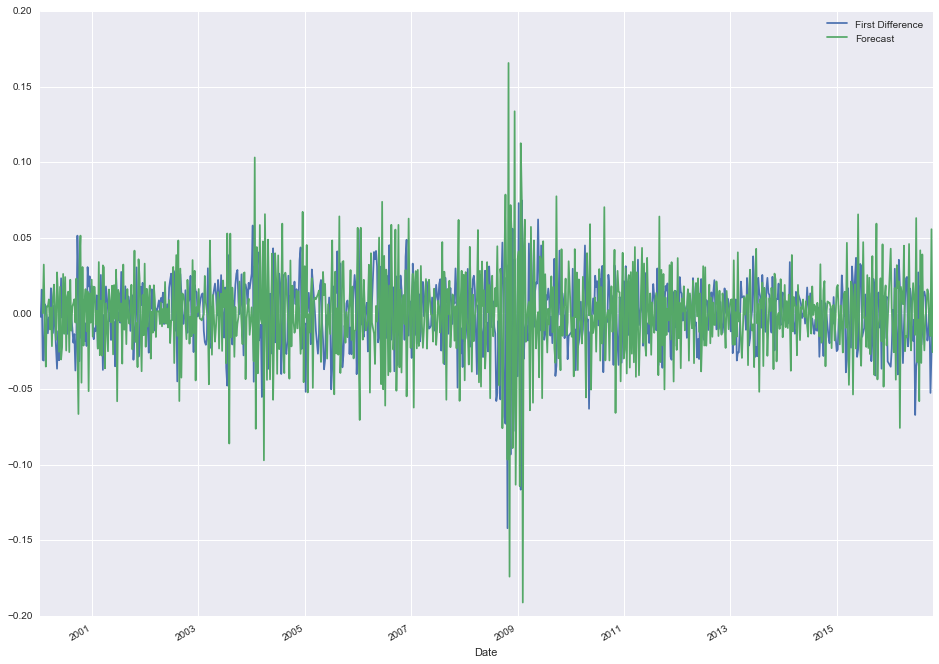

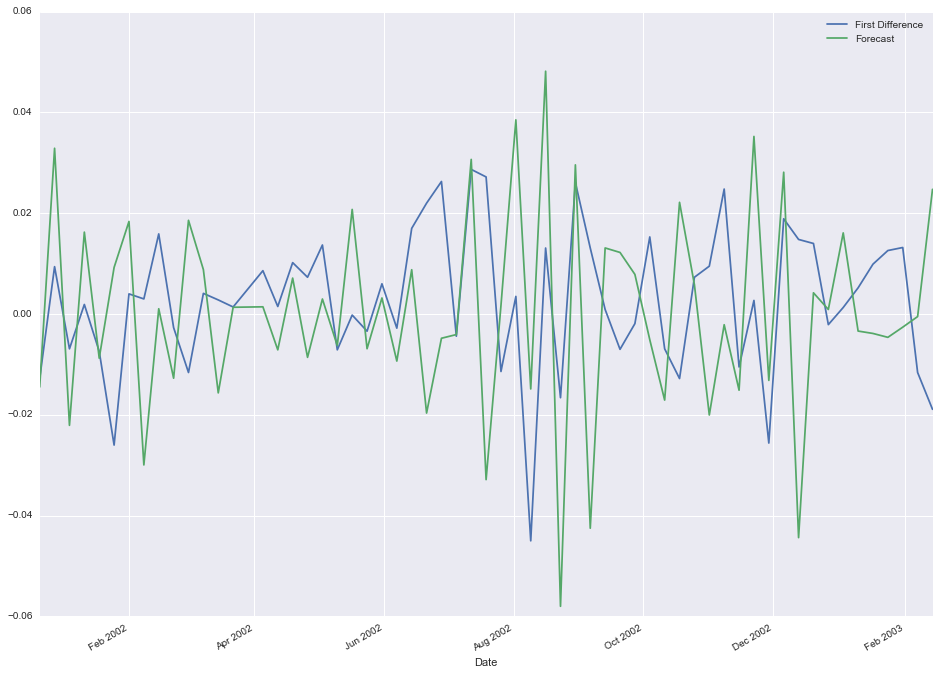

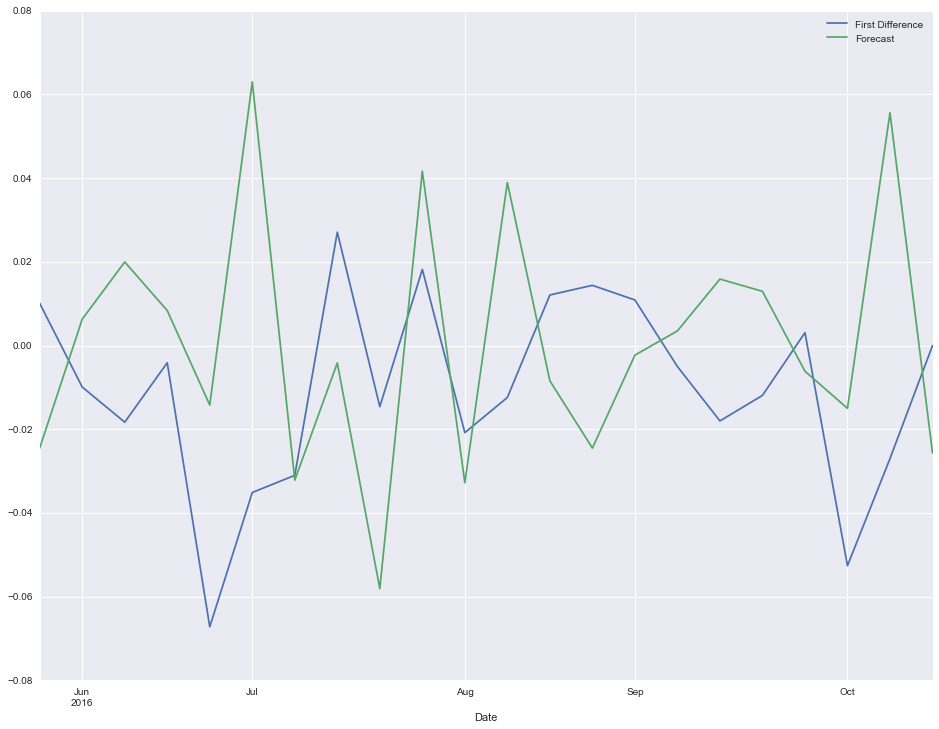

In [150]:
model_UK_US = sm.tsa.ARIMA(UK_US['First Difference'].iloc[1:], order=(0, 2, 1), dates=UK_US['datetime'])  
results = model_UK_US.fit(disp=-1)  
UK_US['Forecast'] = results.fittedvalues  
UK_US[['First Difference', 'Forecast']].plot(figsize=(16, 12))  
UK_US[['First Difference', 'Forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
UK_US[['First Difference', 'Forecast']].iloc[830:860, :].plot(figsize=(16, 12))  

In [155]:
print(results.params)

const                      -0.000014
ar.L1.D.First Difference   -0.473027
dtype: float64
